<a href="https://colab.research.google.com/github/hyndhavamahesh345/Task-5-Decision-Trees-and-Random-Forests/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load dataset
df = pd.read_csv('heart.csv')

In [4]:
# Split into features and target
X = df.drop('target', axis=1)
y = df['target']


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 1: Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



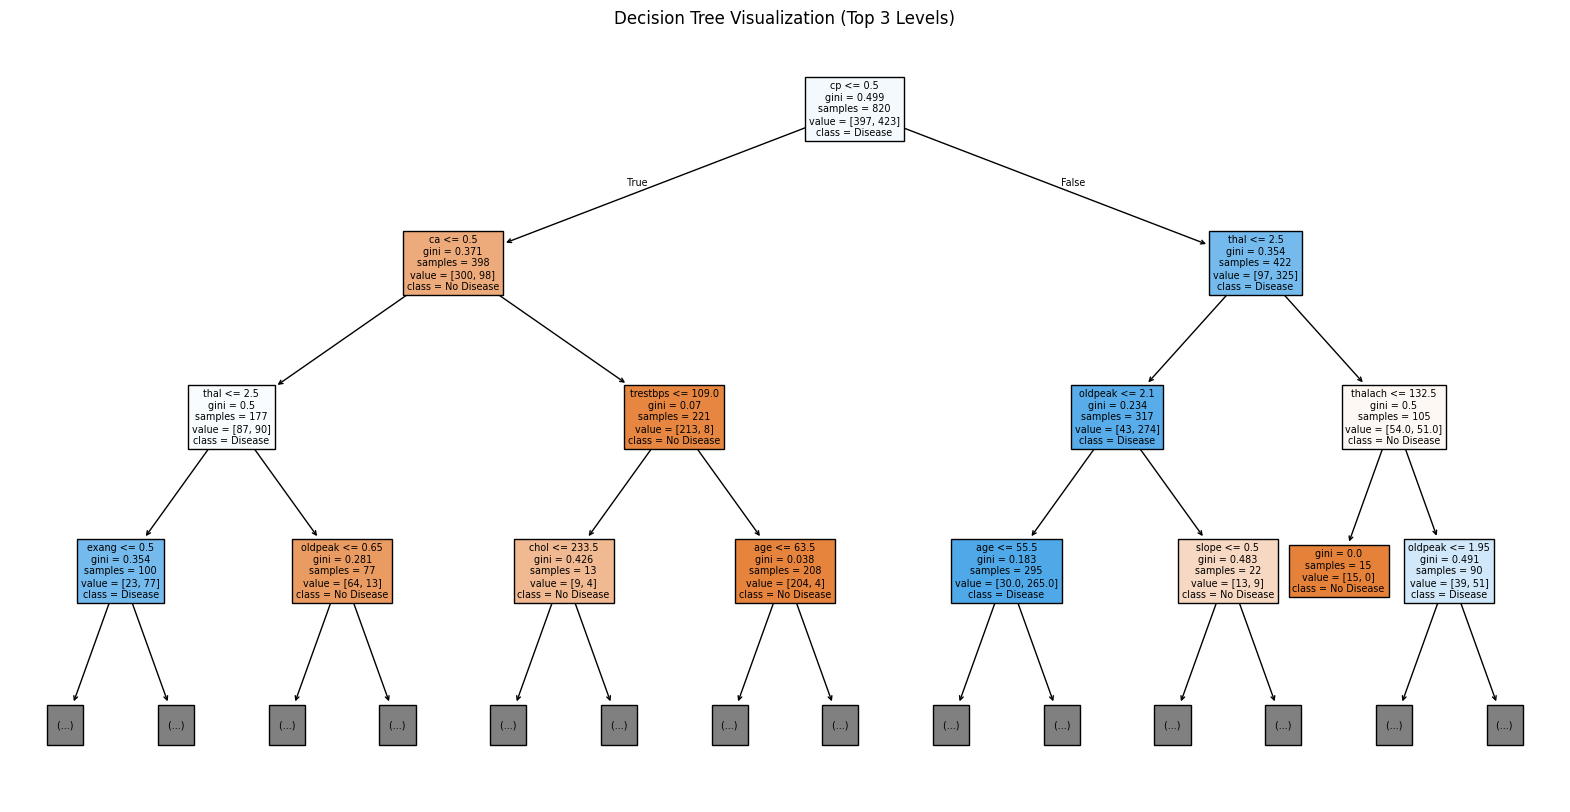

In [8]:
# Step 2: Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"], max_depth=3)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

In [9]:
# Step 3: Analyze Overfitting and Control Tree Depth
depths = range(1, 11)
train_acc = []
test_acc = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

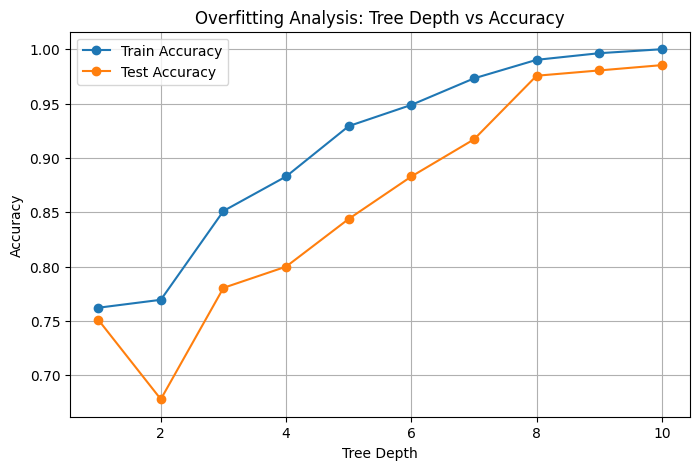

In [10]:
# Plot depth vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Step 4: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



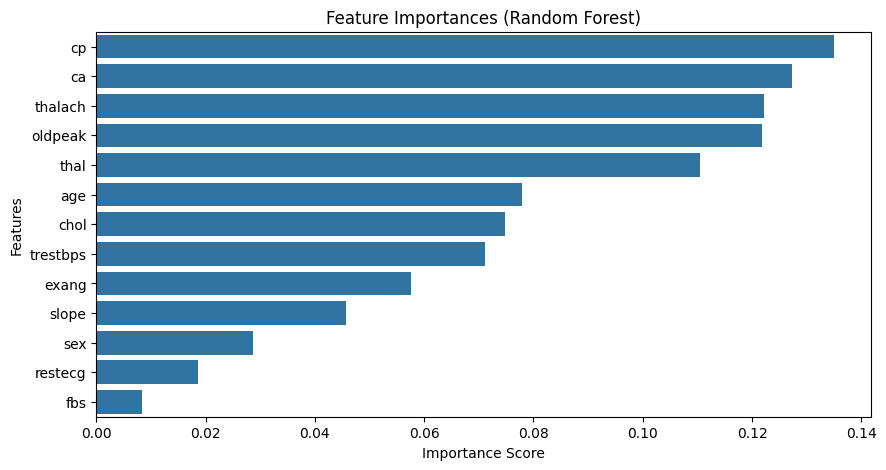

In [12]:
# Step 5: Feature Importance (Random Forest)
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [13]:
# Step 6: Cross-Validation Accuracy
cv_scores_dt = cross_val_score(dt_clf, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)

print("Cross-Validation Accuracy (Decision Tree):", np.round(cv_scores_dt.mean(), 3))
print("Cross-Validation Accuracy (Random Forest):", np.round(cv_scores_rf.mean(), 3))

Cross-Validation Accuracy (Decision Tree): 1.0
Cross-Validation Accuracy (Random Forest): 0.997
